In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("user_profiles_for_ads.csv")
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [3]:
df.shape

(1000, 16)

In [4]:
df.isnull().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [6]:
df.describe()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


In [7]:
df["Education Level"].value_counts()

Education Level
Technical      211
Master         209
High School    205
Bachelor       189
PhD            186
Name: count, dtype: int64

In [8]:
df["Income Level"].value_counts()

Income Level
100k+       176
40k-60k     175
60k-80k     168
80k-100k    168
20k-40k     165
0-20k       148
Name: count, dtype: int64

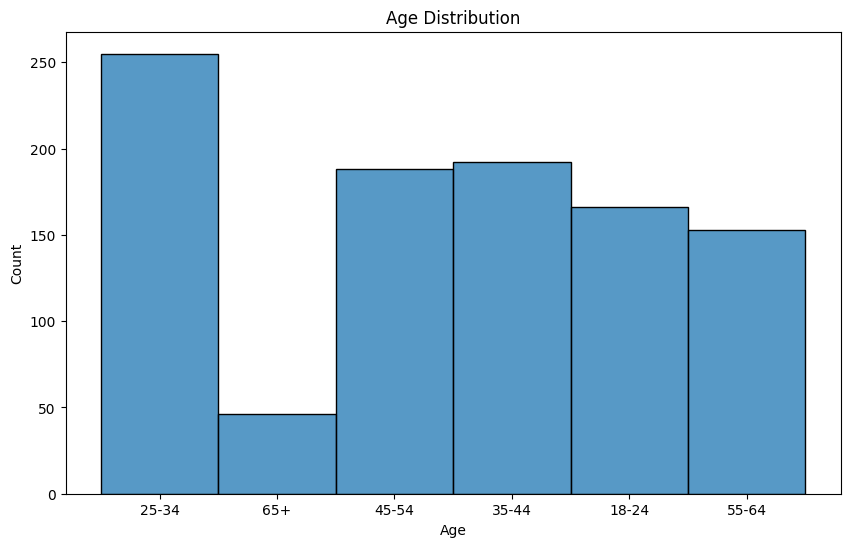

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

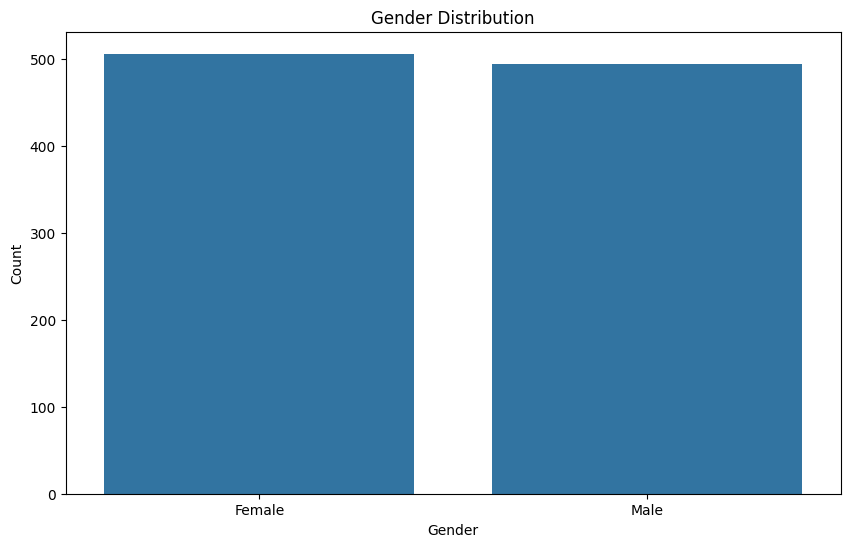

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

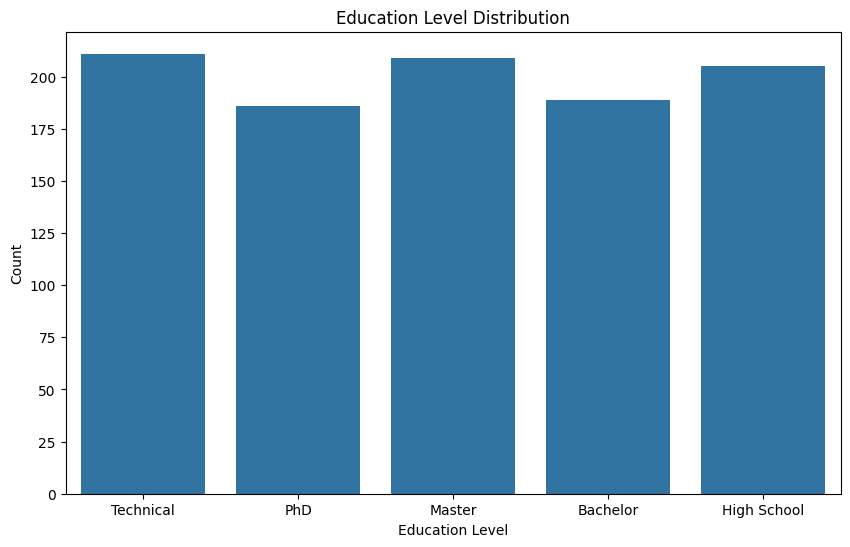

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

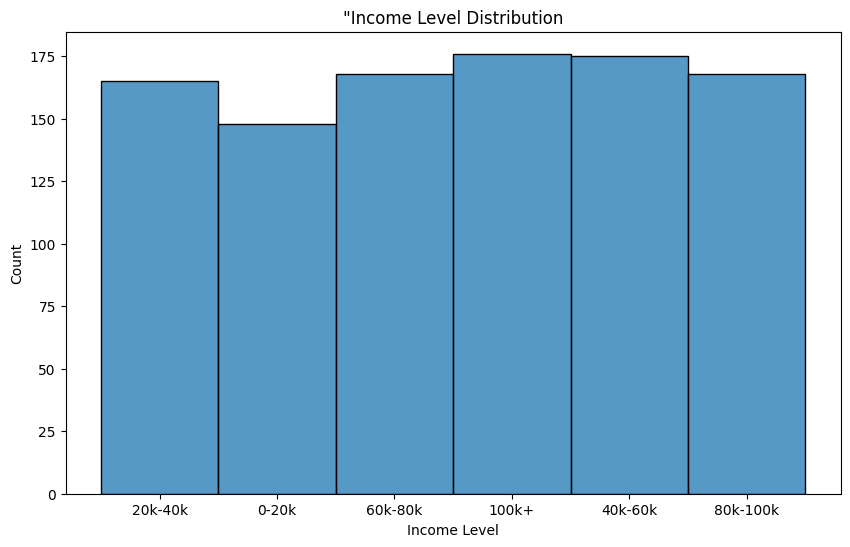

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Income Level"])
plt.title('"Income Level Distribution')
plt.xlabel("Income Level")
plt.ylabel('Count')
plt.show()

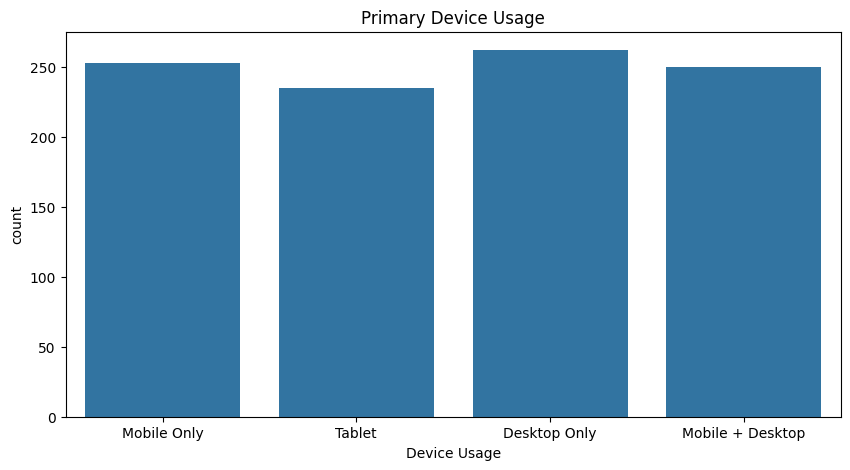

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Device Usage')
plt.title('Primary Device Usage')
plt.show()

In [14]:
df["Top Interests"].value_counts()

Top Interests
Investing and Finance                                                   23
Gaming                                                                  18
Pet Care                                                                18
Digital Marketing                                                       17
Reading and Literature                                                  17
                                                                        ..
Eco-Friendly Living, Photography, Travel and Adventure                   1
Reading and Literature, Digital Marketing, Photography, Data Science     1
Reading and Literature, Gaming, Fitness and Wellness                     1
DIY Crafts, Photography, Gardening, Fitness and Wellness                 1
Data Science, DIY Crafts, Gaming                                         1
Name: count, Length: 680, dtype: int64

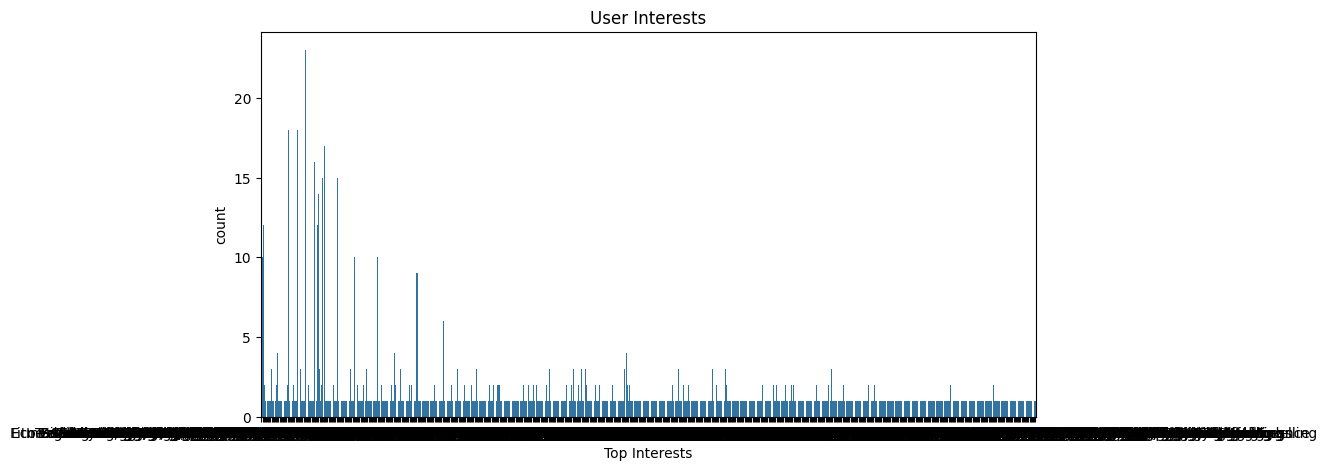

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Top Interests')
plt.title('User Interests')
plt.show()

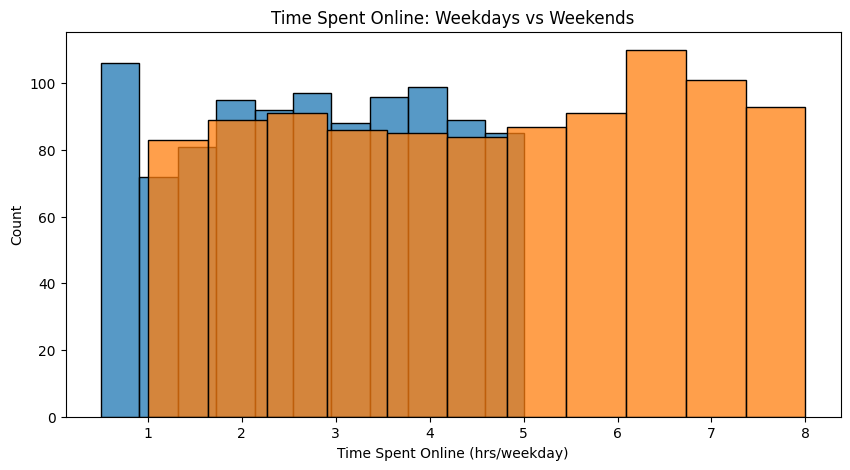

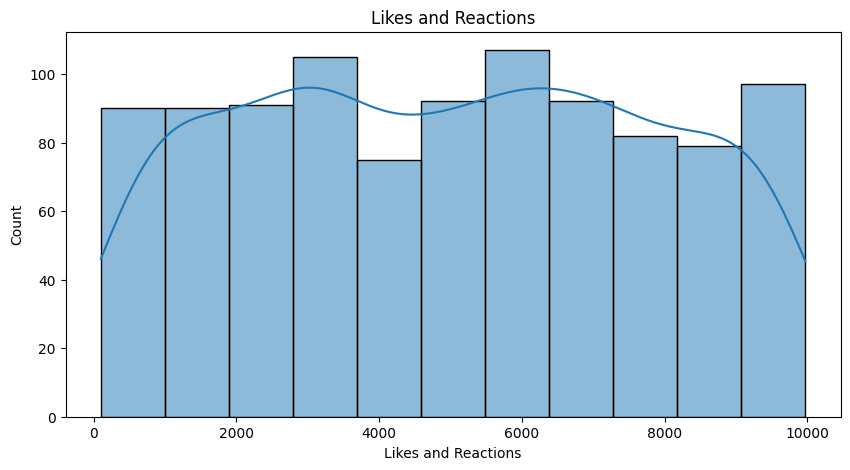

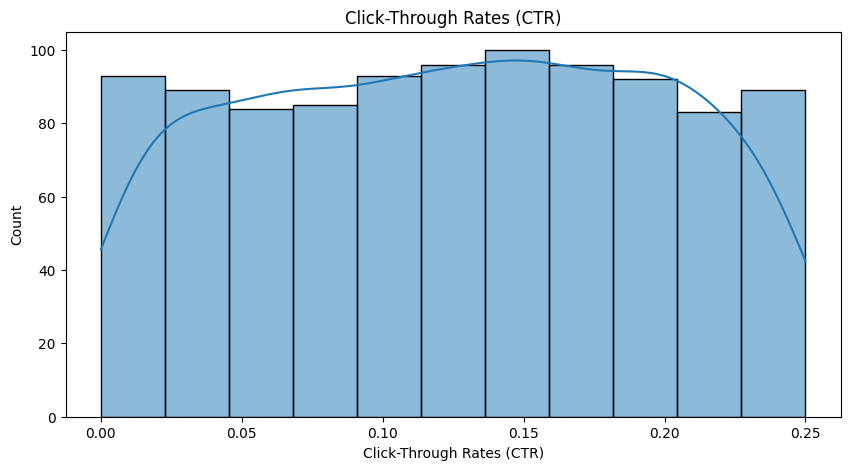

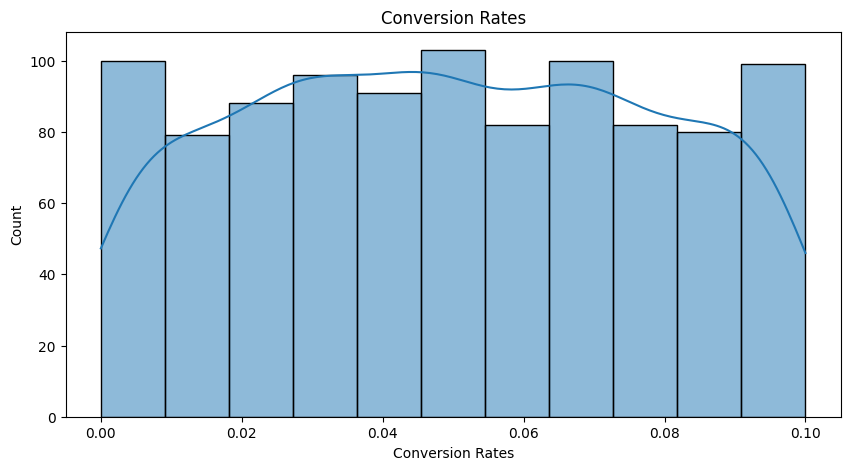

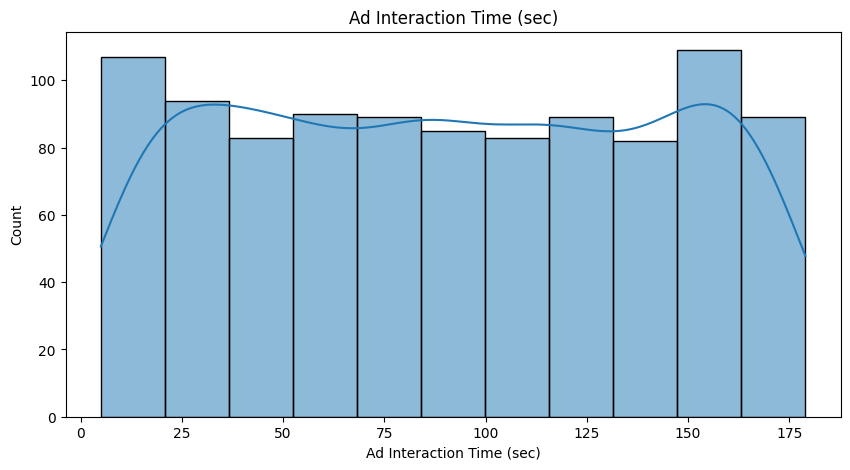

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Time Spent Online (hrs/weekday)')
sns.histplot(data=df, x='Time Spent Online (hrs/weekend)')
plt.title('Time Spent Online: Weekdays vs Weekends')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Likes and Reactions', kde=True)
plt.title('Likes and Reactions')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Click-Through Rates (CTR)', kde=True)
plt.title('Click-Through Rates (CTR)')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Conversion Rates', kde=True)
plt.title('Conversion Rates')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Ad Interaction Time (sec)', kde=True)
plt.title('Ad Interaction Time (sec)')
plt.show()

In [20]:
# Select relevant features for clustering
features = df[['Age', 'Gender', 'Education Level', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)']]

# Preprocessing: Convert categorical variables to numerical
features = pd.get_dummies(features)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)

cluster_centers

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Age_18-24,Age_25-34,Age_35-44,Age_45-54,...,Education Level_High School,Education Level_Master,Education Level_PhD,Education Level_Technical,Income Level_0-20k,Income Level_100k+,Income Level_20k-40k,Income Level_40k-60k,Income Level_60k-80k,Income Level_80k-100k
0,2.660484,4.798387,4972.943548,0.126488,0.051746,93.947581,2.903226e-01,4.395161e-01,3.885781e-16,-2.498002e-16,...,0.217742,0.197581,0.165323,0.241935,0.193548,3.053113e-16,0.213710,0.189516,0.189516,0.213710
1,2.804027,4.848993,4964.000000,0.126148,0.052530,98.013423,1.879195e-01,3.355705e-01,2.498002e-16,1.387779e-16,...,0.147651,0.201342,0.248322,0.228188,0.026846,7.651007e-01,0.080537,0.026846,0.067114,0.033557
2,2.627803,4.522870,5035.448430,0.125229,0.050256,86.816143,2.959641e-01,4.304933e-01,3.885781e-16,-1.942890e-16,...,0.219731,0.215247,0.170404,0.183857,0.165919,2.220446e-16,0.215247,0.242152,0.192825,0.183857
3,2.871277,4.405851,5136.180851,0.120979,0.045761,87.984043,-3.053113e-16,-4.996004e-16,3.053113e-16,1.000000e+00,...,0.228723,0.218085,0.164894,0.207447,0.170213,1.702128e-01,0.122340,0.223404,0.154255,0.159574
4,2.885937,4.438542,4873.182292,0.127594,0.048620,91.776042,-3.053113e-16,-4.996004e-16,1.000000e+00,-5.551115e-17,...,0.192708,0.213542,0.203125,0.192708,0.140625,1.562500e-01,0.151042,0.145833,0.203125,0.203125


In [22]:
# Assign names based on cluster characteristics
cluster_names = {
    0: 'Weekend Users',
    1: 'Professionals',
    2: 'Low-Key Users',
    3: 'Active Users',
    4: 'Budget Users'
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster,Cluster Name
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,0,Weekend Warriors
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,1,Engaged Professionals
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,3,Active Explorers
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",4,Budget Browsers
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",0,Weekend Warriors


In [23]:
labels = np.array(features.columns)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

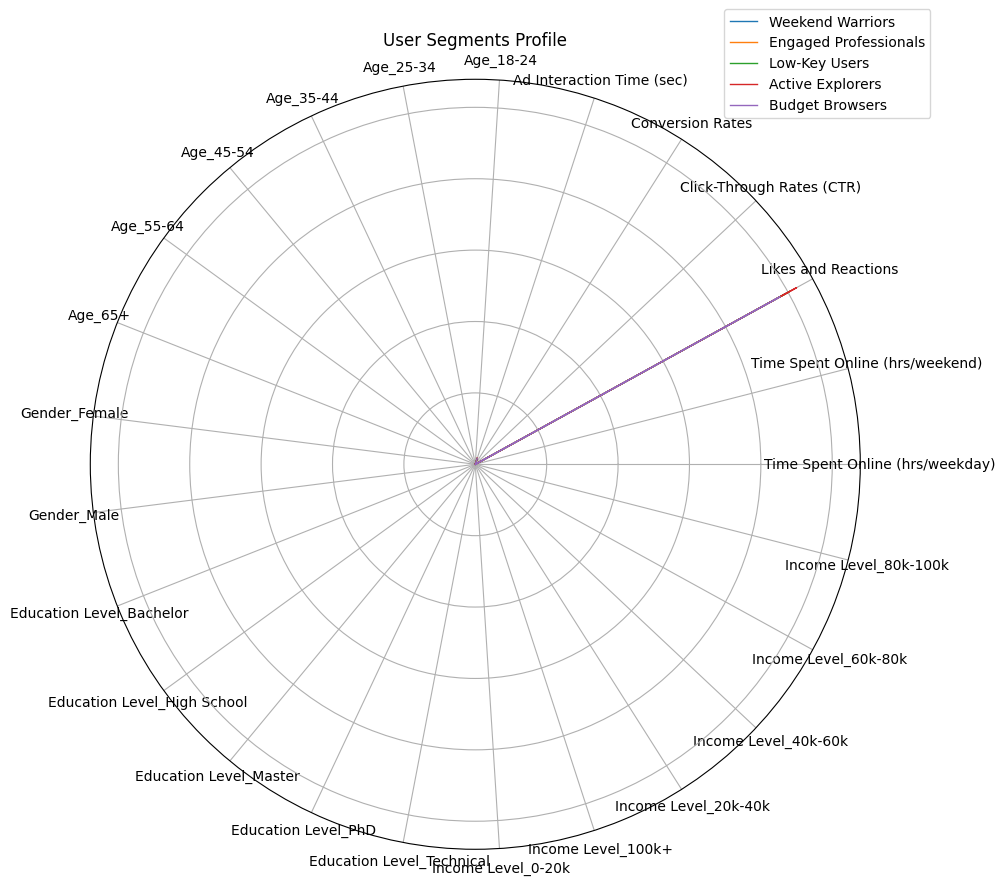

In [27]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
for i in range(len(cluster_centers)):
    values = cluster_centers.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=cluster_names[i])
    ax.fill(angles, values, alpha=0.25)
    
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('User Segments Profile')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()